## تدريب تطبيقي كيف تتصل على الداتابيز 
##  Postgress من خلال
###   Pandas من خلال مكتبة DataFrame من ثم تحويل البيانات الى

# متطلبات التشغيل 

<h3 style="color:red"> Docker تغشيل    </h3>
<h3 style="color:red"> cmd , terminal  الدخول لنفس مسار الملف     </h3>
<h3 style="color:red">  Docker compose up pgsql   تنففيذ       </h3>

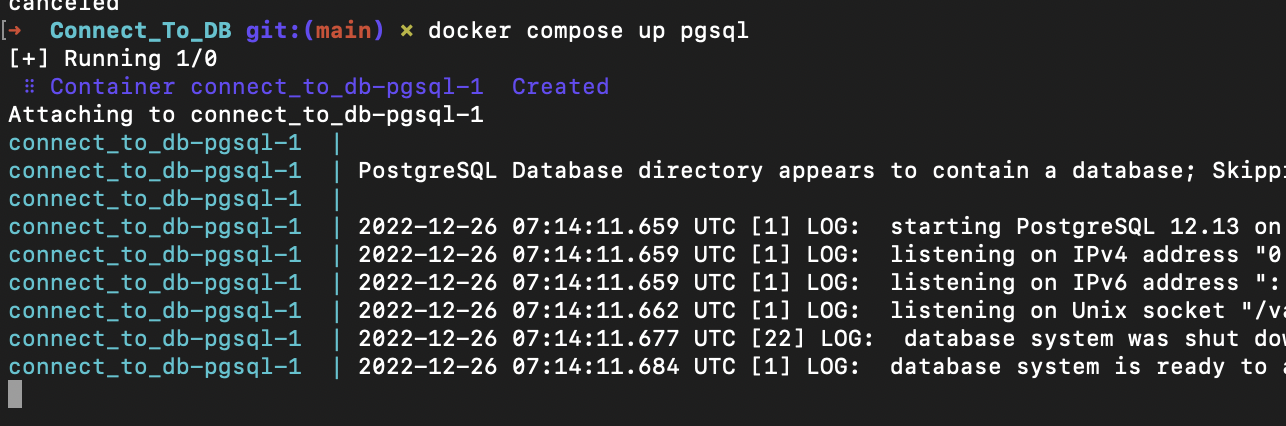

<h3 style="color:red">   تثبيت       </h3>
<h2 style="color:red">   pip install pymssql       </h2>
<h2 style="color:red">   pip install pg8000       </h2>



In [1]:
pip install pg8000

  Using cached pg8000-1.29.4-py3-none-any.whl (51 kB)
  Using cached scramp-1.4.4-py3-none-any.whl (13 kB)
  Using cached asn1crypto-1.5.1-py2.py3-none-any.whl (105 kB)
You should consider upgrading via the '/Users/macbookpro/Desktop/MyFiles/Training/TUWAIQ/AI_BOOOTCAMP/github_AI_REPO/.env3.9/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sqlalchemy

You should consider upgrading via the '/Users/macbookpro/Desktop/MyFiles/Training/TUWAIQ/AI_BOOOTCAMP/github_AI_REPO/.env3.9/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

In [4]:
def CreateTable(db_connection_,TableName:str,Coulmns:dict):
    """
    تسختدم هذي الفنكشن لإنشاء أي جدول 
    """
    try:
        sql_comand = f"CREATE TABLE  {TableName} ("
        for ColName in Coulmns.keys():
            sql_comand+= f" {ColName} {Coulmns[ColName]} "

        sql_comand += " ) ;"
        print("sql_comand = " , sql_comand)
        db_connection_.execute(sql_comand)
    except Exception as ex:
        print("  حدث خطأ اثناء تنفيذ ")
        print(str(ex))

In [5]:
def DropTable(db_connection_,TableName:str):
    """
    تسختدم هذي الفنكشن لحذف أي جدول 
    """
    try:
        sql_comand = f"drop TABLE  {TableName} "
        print("sql_comand = " , sql_comand)
        db_connection_.execute(sql_comand)
    except Exception as ex:
        print("  حدث خطأ اثناء تنفيذ ")
        print(str(ex))

In [6]:
def Insert_Row_to_Table(db_connection_,TableName:str,RowValues:tuple):
    """
    تسختدم هذي الفنكشن لإضافة أي سطر 
    """
    try:
        sql_comand = f"insert into {TableName} values {RowValues}"
        print("sql_comand = " , sql_comand)
        db_connection_.execute(sql_comand)
    except Exception as ex:
        print("  حدث خطأ اثناء تنفيذ ")
        print(str(ex))

In [7]:
def Select_from_table(db_connection_,TableName:str,col_select:str = "*",where_cond:str = " 1 = 1 "):
    """
    تستخدم هذي الفنكشن لإستعلام عن اي جدول 
    """
    try:
        sql_comand = f"select {col_select} from {TableName} where {where_cond}"
        print("sql_comand = " , sql_comand)
        print("resultt = ")
        result = db_connection_.execute(sql_comand).fetchall()
        return result
    except Exception as ex:
        print("  حدث خطأ اثناء تنفيذ ")
        print(str(ex))

In [10]:
# نتصل بالداتا بيز 

drivername_ = "postgresql+pg8000"
username_ = "postgres"
password_ = "postgres"
host_ = "localhost"
port_ = "5432"
database_ = "postgres"


url_object = URL.create(drivername=drivername_, username=username_, password=password_, host=host_, database=database_)
db_connection = create_engine(url_object)


In [12]:
db_connection.connect()

In [13]:
# نجرب نستعلم عن جدول داخل قاعدة البيانات 
Select_from_table(db_connection_=db_connection,TableName="students")

sql_comand =  select * from students where  1 = 1 
resultt = 
  حدث خطأ اثناء تنفيذ 
(pg8000.dbapi.ProgrammingError) {'S': 'ERROR', 'V': 'ERROR', 'C': '42P01', 'M': 'relation "students" does not exist', 'P': '15', 'F': 'parse_relation.c', 'L': '1191', 'R': 'parserOpenTable'}
[SQL: select * from students where  1 = 1 ]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [14]:
# ننشئ الجدول 
Coulmns = {"ID":"int , ",
            "Name":"varchar(255) ,",
            "City":"varchar(255) ",}
CreateTable(db_connection_=db_connection,TableName="students",Coulmns=Coulmns)

sql_comand =  CREATE TABLE  students ( ID int ,   Name varchar(255) ,  City varchar(255)   ) ;


In [15]:
Select_from_table(db_connection_=db_connection,TableName="students")

sql_comand =  select * from students where  1 = 1 
resultt = 


[]

In [16]:
Insert_Row_to_Table(db_connection_=db_connection, TableName="students", RowValues = (1,"Abdulwahab","Riyadh"))
Insert_Row_to_Table(db_connection_=db_connection, TableName="students", RowValues = (10002,"Rakan","Riyadh"))

sql_comand =  insert into students values (1, 'Abdulwahab', 'Riyadh')
sql_comand =  insert into students values (10002, 'Rakan', 'Riyadh')


In [17]:
Select_from_table(db_connection_=db_connection,TableName="students",where_cond="1 = 1")

sql_comand =  select * from students where 1 = 1
resultt = 


[(1, 'Abdulwahab', 'Riyadh'), (10002, 'Rakan', 'Riyadh')]

#  الان نجرب نضيفف بينات من ملفات خارجيه للداتا بيز

In [18]:
ls Data/csv

Customers.csv        Sales.csv            Titles.csv
Obsolete_Titles.csv  Slspers.csv


In [19]:

Customers_df = pd.read_csv("Data/csv/Customers.csv")
Obsolete_Titles_df = pd.read_csv("Data/csv/Obsolete_Titles.csv")
Sales_df = pd.read_csv("Data/csv/Sales.csv")
Slspers_df = pd.read_csv("Data/csv/Slspers.csv")
Titles_df = pd.read_csv("Data/csv/Titles.csv")

<h2 style="color:red">   new tabel names MUST BE lower Case        </h2>


In [20]:
Customers_df.to_sql("customers",con=db_connection)
Obsolete_Titles_df.to_sql("obsolete_Titles",con=db_connection)
Sales_df.to_sql("sales",con=db_connection)
Slspers_df.to_sql("slspers",con=db_connection)
Titles_df.to_sql("titles",con=db_connection)

92

In [21]:
Select_from_table(db_connection_=db_connection,TableName="customers")[1:5]

sql_comand =  select * from customers where  1 = 1 
resultt = 


[(1, 20151, 20330, 'Friendly Books', '19 International Dr.     ', 'Ryebrook            ', 'NY', '10573       ', 'S03'),
 (2, 20181, 20506, 'The Book Stop', '512 Columbia Road        ', 'Somerville          ', 'NJ', '08876', 'E02'),
 (3, 20309, 20151, "Mary's Card Shoppe", '981 Connecticut Blvd.    ', 'East Hartford       ', 'CT', '06108       ', 'S01'),
 (4, 20330, 99999, 'TechTraining', '51 Ulster St.            ', 'Denver              ', 'CO', '80237       ', 'S03')]

In [22]:
df = pd.read_sql_query("SELECT * FROM customers", con=db_connection)

In [23]:
df.head()

,index,custnum,referredby,custname,address,city,state,zipcode,repid
0,0,20042,20555,CK Music!,#1149 Blossom Road,Rochester,NY,14610,S01
1,1,20151,20330,Friendly Books,19 International Dr.,Ryebrook,NY,10573,S03
2,2,20181,20506,The Book Stop,512 Columbia Road,Somerville,NJ,08876,E02
3,3,20309,20151,Mary's Card Shoppe,981 Connecticut Blvd.,East Hartford,CT,06108,S01
4,4,20330,99999,TechTraining,51 Ulster St.,Denver,CO,80237,S03
